# Market Opportunity Analysis: Sustainable Fashion Market Analysis

Name: Durga

Student Number: 

Programme: MSc Entrepreneurship

## Reading the dataset

In [1]:
import pandas as pd

In [2]:
sustainable = pd.read_csv('Patagonia_Order.csv', engine='python', encoding_errors='ignore')

In [3]:
print(sustainable.head())

     Order_ID  Order_Date       Customer_Location Customer_ID  Age  \
0  ORD-000001  2023-10-25          Norway, Bergen  CUST-00001   33   
1  ORD-000002  2025-01-08       Sweden, Stockholm  CUST-00002   55   
2  ORD-000003  2024-07-30  Netherlands, Amsterdam  CUST-00003   47   
3  ORD-000004  2024-05-28            Norway, Oslo  CUST-00004   42   
4  ORD-000005  2023-08-29           USA, Portland  CUST-00005   33   

                 Occupation  Gender Category_Name Category_ID Product_ID  ...  \
0    Special effects artist    Male         Shirt      CAT-01   SHI-3954  ...   
1             Herpetologist  Female         Shoes      CAT-05   SHO-9745  ...   
2       Immigration officer  Female        Jacket      CAT-04    JA-3514  ...   
3  Counselling psychologist    Male           Bag      CAT-06    BA-2024  ...   
4              Risk manager  Female         Pants      CAT-02    PA-4342  ...   

  Unit_Price ($)  Total_Revenue ($) Eco_Certification  \
0             50                150

## Data Collection & Preparation

In [4]:
import numpy as np

print("Shape of dataset:", sustainable.shape)
print("\nColumn Data Types:\n", sustainable.dtypes)
print("\nMissing Values:\n", sustainable.isnull().sum())

Shape of dataset: (17000, 23)

Column Data Types:
 Order_ID                             object
Order_Date                           object
Customer_Location                    object
Customer_ID                          object
Age                                   int64
Occupation                           object
Gender                               object
Category_Name                        object
Category_ID                          object
Product_ID                           object
Product_Name                         object
Quantity_Sold                         int64
Material                             object
Unit_Price ($)                        int64
Total_Revenue ($)                     int64
Eco_Certification                    object
Manufacturing_Emission (kg CO2)     float64
Water_Usage (liters)                  int64
Percentage_Recycled_Material (%)      int64
Carbon_Offset_Investment ($)        float64
Return_Status                        object
Return_Reason            

In [6]:
# Handle missing values specifically
# Fill missing values safely
sustainable['Eco_Certification'] = sustainable['Eco_Certification'].fillna('Unknown')
sustainable['Return_Reason'] = sustainable['Return_Reason'].fillna('Not Provided')

# Confirm no missing values remain
print("Remaining Missing Values:\n", sustainable.isnull().sum())

Remaining Missing Values:
 Order_ID                            0
Order_Date                          0
Customer_Location                   0
Customer_ID                         0
Age                                 0
Occupation                          0
Gender                              0
Category_Name                       0
Category_ID                         0
Product_ID                          0
Product_Name                        0
Quantity_Sold                       0
Material                            0
Unit_Price ($)                      0
Total_Revenue ($)                   0
Eco_Certification                   0
Manufacturing_Emission (kg CO2)     0
Water_Usage (liters)                0
Percentage_Recycled_Material (%)    0
Carbon_Offset_Investment ($)        0
Return_Status                       0
Return_Reason                       0
Customer_Feedback                   0
dtype: int64


In [7]:
# Convert 'Order_Date' to datetime format 
sustainable['Order_Date'] = pd.to_datetime(sustainable['Order_Date'], errors='coerce')

# Strip whitespace from text/object columns
for col in sustainable.select_dtypes(include='object').columns:
    sustainable[col] = sustainable[col].astype(str).str.strip()

# Convert numeric columns to proper types 
numeric_columns = [
    'Quantity_Sold',
    'Unit_Price ($)',
    'Total_Revenue ($)',
    'Manufacturing_Emission (kg CO2)',
    'Water_Usage (liters)',
    'Percentage_Recycled_Material (%)',
    'Carbon_Offset_Investment ($)',
    'Age'
]

for col in numeric_columns:
    if col in sustainable.columns:
        sustainable[col] = (
            sustainable[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.replace('$', '', regex=False)
            .str.replace('%', '', regex=False)
        )
        sustainable[col] = pd.to_numeric(sustainable[col], errors='coerce')

# Handle missing values 
# Fill numeric NaNs with median, categorical NaNs with mode
for col in sustainable.columns:
    if sustainable[col].dtype in ['float64', 'int64']:
        sustainable[col].fillna(sustainable[col].median(), inplace=True)
    else:
        sustainable[col].fillna(sustainable[col].mode()[0], inplace=True)

# Remove duplicates 
sustainable.drop_duplicates(inplace=True)

# Handle outliers (using IQR for main numeric columns) 
for col in numeric_columns:
    if col in sustainable.columns:
        Q1 = sustainable[col].quantile(0.25)
        Q3 = sustainable[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        sustainable = sustainable[(sustainable[col] >= lower) & (sustainable[col] <= upper)]

# Confirm cleaning results 
print("\nAfter Cleaning:")
print("Shape:", sustainable.shape)
print("Remaining Missing Values:\n", sustainable.isnull().sum().sum())
print("Duplicate Rows:", sustainable.duplicated().sum())

# Preview cleaned data 
sustainable.head()


After Cleaning:
Shape: (16598, 23)
Remaining Missing Values:
 0
Duplicate Rows: 0


C:\Users\PC\AppData\Local\Temp\ipykernel_33856\3539789894.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sustainable[col].fillna(sustainable[col].mode()[0], inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_33856\3539789894.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

Order_ID Order_Date       Customer_Location Customer_ID  Age  \
0  ORD-000001 2023-10-25          Norway, Bergen  CUST-00001   33   
1  ORD-000002 2025-01-08       Sweden, Stockholm  CUST-00002   55   
2  ORD-000003 2024-07-30  Netherlands, Amsterdam  CUST-00003   47   
3  ORD-000004 2024-05-28            Norway, Oslo  CUST-00004   42   
4  ORD-000005 2023-08-29           USA, Portland  CUST-00005   33   

                 Occupation  Gender Category_Name Category_ID Product_ID  ...  \
0    Special effects artist    Male         Shirt      CAT-01   SHI-3954  ...   
1             Herpetologist  Female         Shoes      CAT-05   SHO-9745  ...   
2       Immigration officer  Female        Jacket      CAT-04    JA-3514  ...   
3  Counselling psychologist    Male           Bag      CAT-06    BA-2024  ...   
4              Risk manager  Female         Pants      CAT-02    PA-4342  ...   

  Unit_Price ($)  Total_Revenue ($) Eco_Certification  \
0             50                150              GOTS   
1            135                405          OEKO-TEX   
2            250                750            B Corp   
3             90                 90          OEKO-TEX   
4             75                300        Fair Trade   

   Manufacturing_Emission (kg CO2)  Water_Usage (liters)  \
0                            12.39                  1800   
1                             3.58                  2238   
2                             5.56                   779   
3                             8.90                  1135   
4                             2.73                  1306   

  Percentage_Recycled_Material (%)  Carbon_Offset_Investment ($)  \
0                               77                          0.62   
1                               70                          0.18   
2                               65                          0.28   
3                               48                          0.45   
4                               56                          0.14   

   Return_Status    Return_Reason  Customer_Feedback  
0       Returned  Not as Expected          Excellent  
1   Not Returned     Not Provided          Excellent  
2   Not Returned     Not Provided          Excellent  
3   Not Returned     Not Provided               Good  
4   Not Returned     Not Provided          Excellent  

[5 rows x 23 columns]

This study uses the resource of the publicly popular open-source data science platform of Kaggle the Sustainable Fashion Orders dataset (Le, 2025). This sustainable fashion is represented by real e-commerce data set of customers, orders, products, and environmental signifiers such as water use and carbon footprint. The dataset in the form of CSV was imported into Python and analyzed with the help of the Pandas package. This data was chosen due to the fact that it follows the main goal of this project to assess this sustainable fashion industry with the help of data in order to discover trends, consumer behaviors, and sustainability opportunities.

## Data Governance Considerations

Data governance is vital because it will involve ensuring that data in this project are handled appropriately and ethically. As the dataset is based on the Kaggle and does not contain any personally identifiable information, it is compliant with GDPR and other laws. We conducted a research and an analysis without any bias or distorting of the data according to all of the relevant ethical standards. Anonymised datasets were also applied in all the studies in order to avoid associated sensitive or personally identifying information. Project transparency and accountability have been evidenced through its comprehensive research of the sources of data, data processing, and data analytical decisions. These governance techniques have a positive effect on trustworthiness, replicability, and adherence to data protection regulations, promoting the use and open data in sustainable business analytics through justice, privacy, and ethical use.

## Data Preprocessing 

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy the cleaned dataset to avoid altering the original
data = sustainable.copy()

# Encode categorical variables 
# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Use LabelEncoder for simplicity
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print("Categorical columns encoded:", categorical_cols)

# Feature scaling 
# Identify numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("\nNumeric columns scaled:", numeric_cols)

# Verify preprocessing 
print("\nShape of preprocessed dataset:", data.shape)
print("\nPreview of preprocessed data:")
print(data.head())

Categorical columns encoded: ['Order_ID', 'Customer_Location', 'Customer_ID', 'Occupation', 'Gender', 'Category_Name', 'Category_ID', 'Product_ID', 'Product_Name', 'Material', 'Eco_Certification', 'Return_Status', 'Return_Reason', 'Customer_Feedback']

Numeric columns scaled: ['Age', 'Quantity_Sold', 'Unit_Price ($)', 'Total_Revenue ($)', 'Manufacturing_Emission (kg CO2)', 'Water_Usage (liters)', 'Percentage_Recycled_Material (%)', 'Carbon_Offset_Investment ($)']

Shape of preprocessed dataset: (16598, 23)

Preview of preprocessed data:
   Order_ID Order_Date  Customer_Location  Customer_ID       Age  Occupation  \
0         0 2023-10-25                  7            0 -0.426844         555   
1         1 2025-01-08                  9            1  1.697146         290   
2         2 2024-07-30                  5            2  0.924786         313   
3         3 2024-05-28                  8            3  0.442061         143   
4         4 2023-08-29                 13            4 -0

## Analytics & Insights Generation

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### DESCRIPTIVE ANALYTICS

In [11]:
# DESCRIPTIVE ANALYTICS — What happened?
df = sustainable.copy()
print("Basic Summary Statistics:\n")
print(df.describe())

Basic Summary Statistics:

                          Order_Date           Age  Quantity_Sold  \
count                          16598  16598.000000   16598.000000   
mean   2024-04-09 22:36:01.127846656     37.421195       2.951801   
min              2023-04-11 00:00:00     20.000000       1.000000   
25%              2023-10-12 00:00:00     28.000000       2.000000   
50%              2024-04-11 00:00:00     37.000000       3.000000   
75%              2024-10-08 00:00:00     46.000000       4.000000   
max              2025-04-10 00:00:00     55.000000       5.000000   
std                              NaN     10.358177       1.393774   

       Unit_Price ($)  Total_Revenue ($)  Manufacturing_Emission (kg CO2)  \
count    16598.000000       16598.000000                     16598.000000   
mean       123.328112         358.540487                         8.500352   
min         40.000000          40.000000                         2.000000   
25%         85.000000         180.000000   

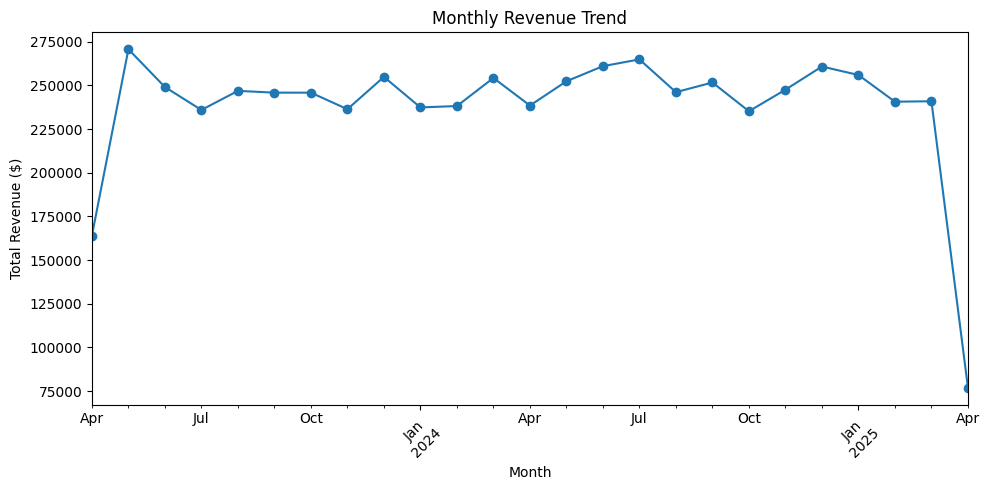

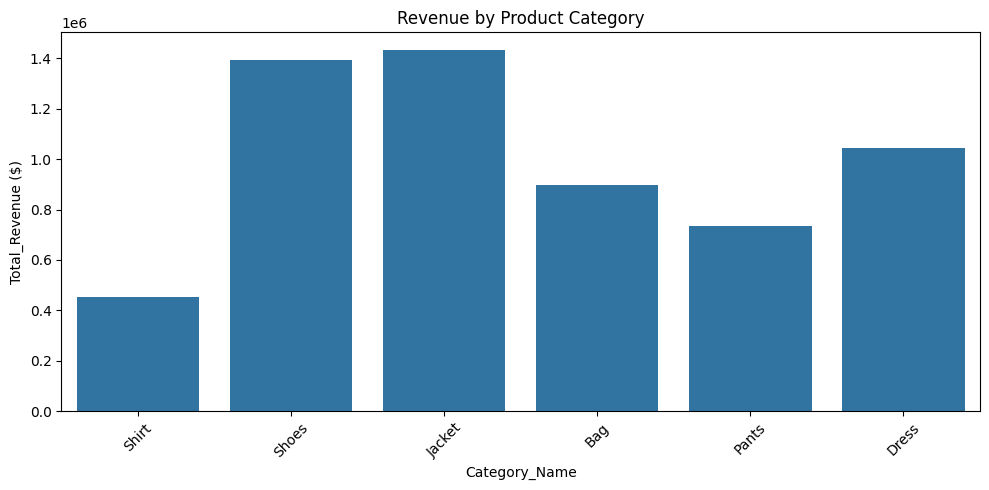

In [12]:
# Total Revenue by Month
df['Month'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total_Revenue ($)'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Revenue by Category
plt.figure(figsize=(10,5))
sns.barplot(x='Category_Name', y='Total_Revenue ($)', data=df, estimator='sum', errorbar=None)
plt.title('Revenue by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### PREDICTIVE ANALYTICS

Model Performance:
R² Score: 0.902
MAE: 51.62
RMSE: 71.48


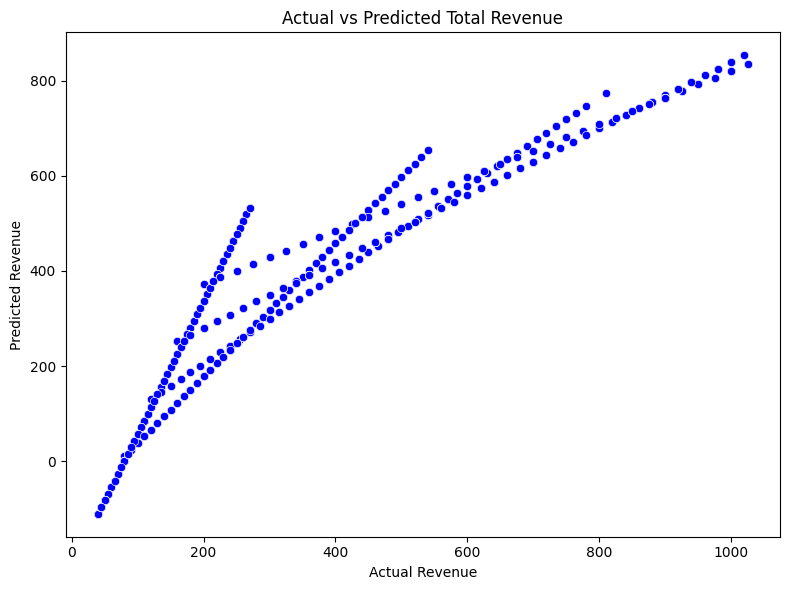

Predicted Total Revenue for Quantity=10 & Unit Price=$150 → $1285.08


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# PREDICTIVE ANALYTICS – What might happen?

# Define features and target
X = sustainable[['Quantity_Sold', 'Unit_Price ($)']]
y = sustainable['Total_Revenue ($)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Total Revenue')
plt.tight_layout()
plt.show()

# Predict example
example = pd.DataFrame({'Quantity_Sold':[10], 'Unit_Price ($)':[150]})
predicted = model.predict(example)[0]
print(f"Predicted Total Revenue for Quantity=10 & Unit Price=$150 → ${predicted:.2f}")

### PRESCRIPTIVE ANALYTICS


📊 PRESCRIPTIVE INSIGHTS:
- Focus on scaling the 'Jacket' category, which yields the highest total revenue.
- Improve eco-efficiency: current average = $55.57 per kg CO2.
- Encourage eco-certified materials to attract sustainability-conscious customers.
- Consider strategic pricing around $150/unit where predicted sales yield strong revenue.
- Maintain a balance between sales volume and sustainability investment to optimize returns.


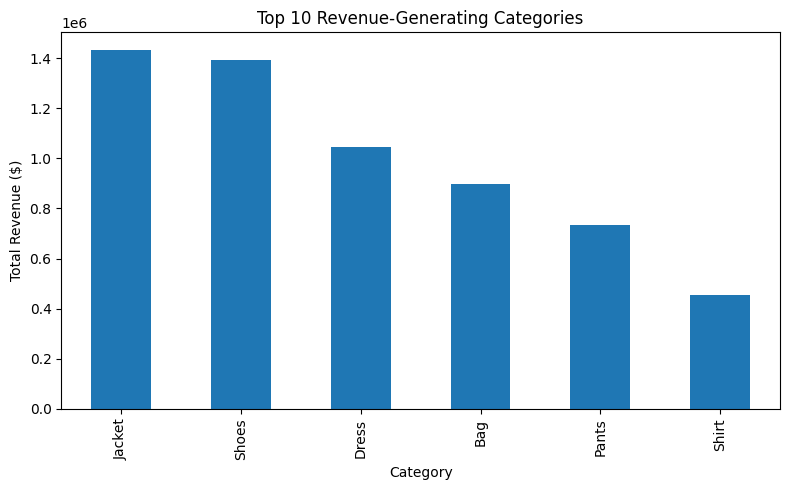

In [18]:
# PRESCRIPTIVE ANALYTICS – What should we do?

# Calculate category-level profitability
category_revenue = sustainable.groupby('Category_Name')['Total_Revenue ($)'].sum().sort_values(ascending=False)
top_category = category_revenue.index[0]

# Compute eco-efficiency: Revenue per kg of CO2 emission
sustainable['Revenue_per_CO2'] = sustainable['Total_Revenue ($)'] / sustainable['Manufacturing_Emission (kg CO2)']
eco_efficiency = sustainable['Revenue_per_CO2'].mean()

print("\n📊 PRESCRIPTIVE INSIGHTS:")
print(f"- Focus on scaling the '{top_category}' category, which yields the highest total revenue.")
print(f"- Improve eco-efficiency: current average = ${eco_efficiency:.2f} per kg CO2.")
print("- Encourage eco-certified materials to attract sustainability-conscious customers.")
print("- Consider strategic pricing around $150/unit where predicted sales yield strong revenue.")
print("- Maintain a balance between sales volume and sustainability investment to optimize returns.")

# Visualization for Prescriptive Summary
plt.figure(figsize=(8,5))
category_revenue.head(10).plot(kind='bar')
plt.title('Top 10 Revenue-Generating Categories')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()

## Visualizations 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

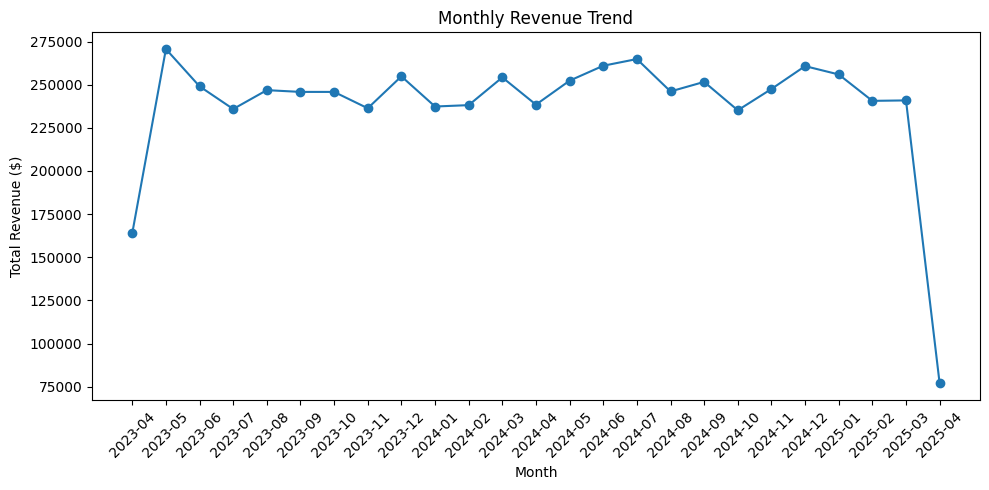

In [20]:
# Use the cleaned dataset
df = sustainable.copy()

# Ensure date conversion for time-based plots
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Monthly Revenue Trend 
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total_Revenue ($)'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Total_Revenue ($)'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph illustrates the month-to-month changes in the sales of Patagonia’s sustainable fashion line. Sustained the same revenue stream between the middle of 2023 to the beginning of 2025 shows consistent customer demand, and well executed sales strategy as the pattern exemplifies. There is an increase in revenue in April 2023 which can be influenced by a larger marketing strategy or new products, which is followed by a consistent increase. The large drop could be attributed to a temporary sales disruption, data seasonality, or a lack of data in April 2025. Overall there is a consistent pattern of sales, with intermittent spikes, and unusual activity at the end of each quarter.

C:\Users\PC\AppData\Local\Temp\ipykernel_33856\4288183901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


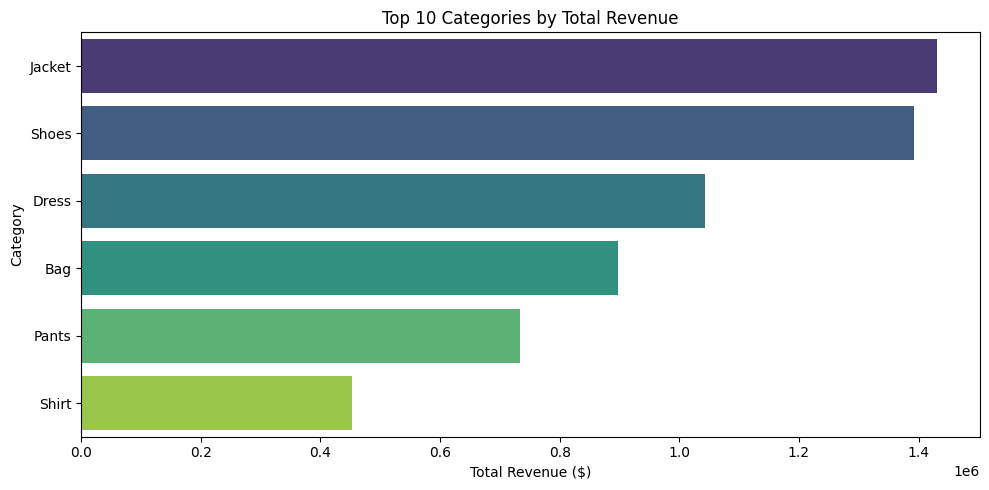

In [21]:
# Top 10 Product Categories by Revenue
top_categories = df.groupby('Category_Name')['Total_Revenue ($)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories by Total Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

The illustration provides an overview of the sustainable fashion industry's highest revenue-generating product categories. Coats and shoes are the most profitable items and, in decreasing order, followed by dresses, purses, jeans, and shirts. Customer demand for clothing and footwear might be attributed to higher prices and seasonal demand. Lower-ranked categories, such as shirts, may be the result of aggressive pricing competition or lower sales overall. These insights guide Patagonia in directing its marketing and manufacturing efforts toward top product categories while enhancing visibility and innovative efforts in underperforming ones.

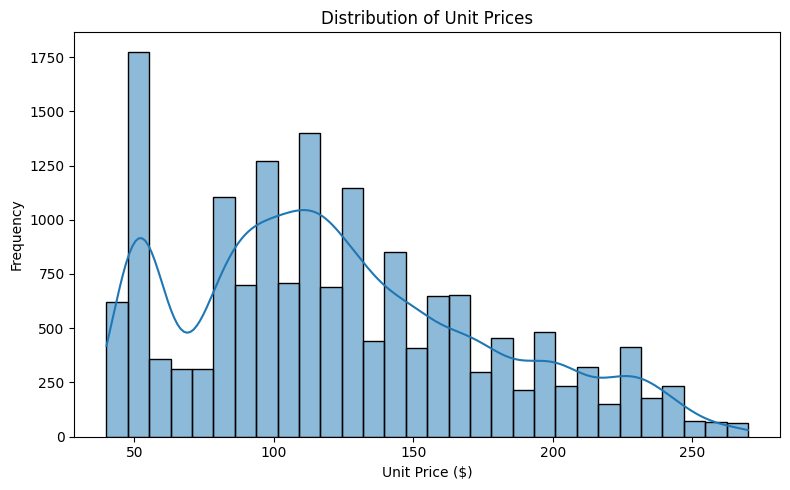

In [22]:
# Distribution of Unit Prices 
plt.figure(figsize=(8,5))
sns.histplot(df['Unit_Price ($)'], bins=30, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Data shows that most sustainable fashion goods range from 50 to 150, suggesting a mid-range pricing strategy. As a result, price distribution shows a right skew. There is also an emphasis on affordable luxury, for buyers who care for the environment.

C:\Users\PC\AppData\Local\Temp\ipykernel_33856\2711083014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_revenue.index, y=gender_revenue.values, palette='coolwarm')


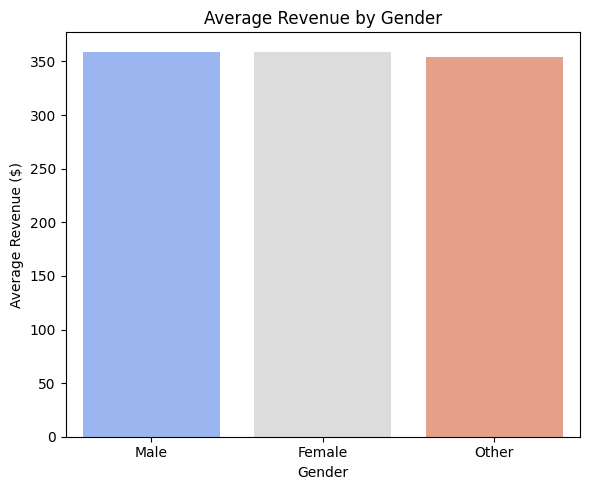

In [23]:
# Average Revenue by Gender 
gender_revenue = df.groupby('Gender')['Total_Revenue ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,5))
sns.barplot(x=gender_revenue.index, y=gender_revenue.values, palette='coolwarm')
plt.title('Average Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Revenue ($)')
plt.tight_layout()
plt.show()

Average revenue across genders seems fairly equally distributed. This demonstrates that Patagonia attracts a gender balanced audience to their sustainable offerings, which shows that inclusive marketing is working, and that participation in sustainable fashion is widespread.

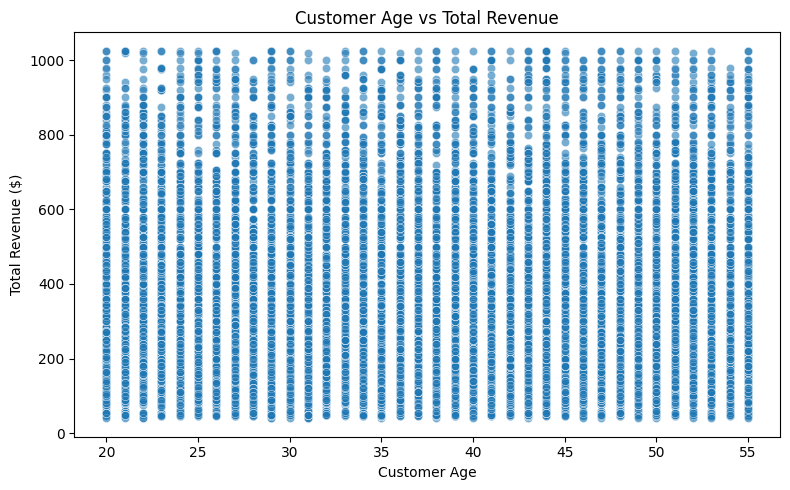

In [24]:
# Age vs Revenue (Scatter Plot) 
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Total_Revenue ($)', data=df, alpha=0.6)
plt.title('Customer Age vs Total Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()

Revenue as a function of customer age shows no correlation, suggesting that sustainable fashion appeals to all ages. There is an active customer base for Patagonia’s eco-friendly offerings in the age range of 20 to 55, demonstrating that the brand appeals to a broad demographic.

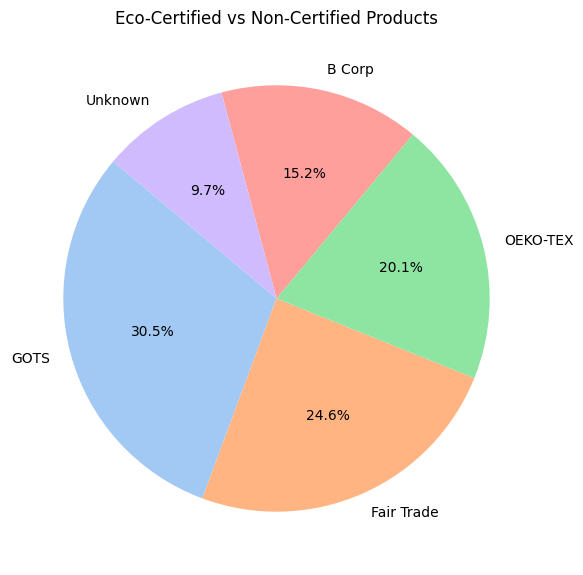

In [25]:
# Eco-Certified vs Non-Certified Products 
eco_counts = df['Eco_Certification'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(eco_counts, labels=eco_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Eco-Certified vs Non-Certified Products')
plt.tight_layout()
plt.show()

Patagonia's eco-certification pie chart reflects the following. Sustainability compliance is high with GOTS (30.5%), Fair Trade (24.6%), and OEKO-TEX (20.1%). The wider reach of the ethically certified supply chain with less than 10% “Unknown” points for more ethical sourcing and certification tracking transparency the organization could improve on.

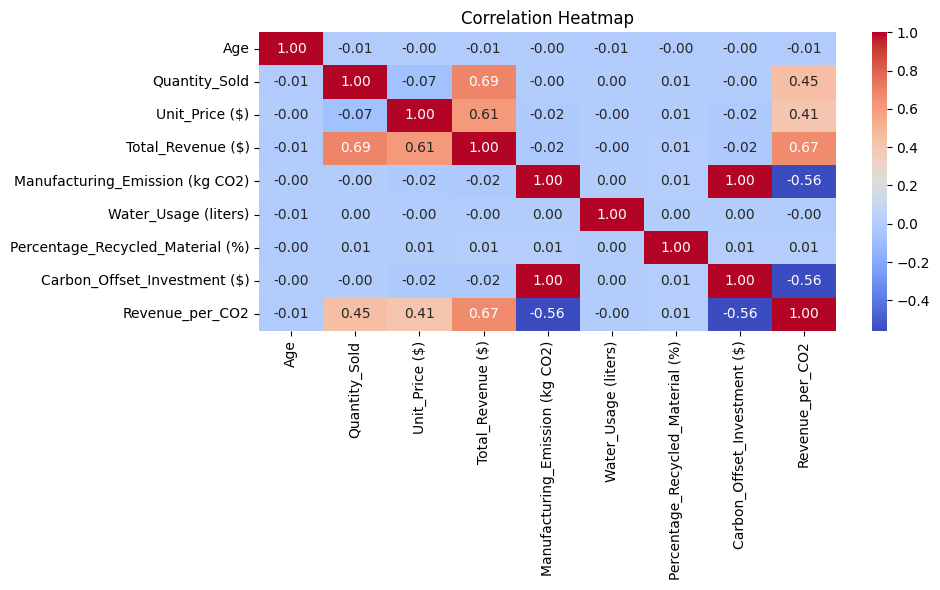

In [26]:
# Correlation Heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Total revenue tend to increase with sold quantity and unit price. This shows the increase in price and volume is effective in achieving the sales increase objective. The increase in profit seems to come at the expense of the environment and hence the negative relationship between Manufacturing Emission and Carbon Offset Investment points to an urgent need for equilibrium.

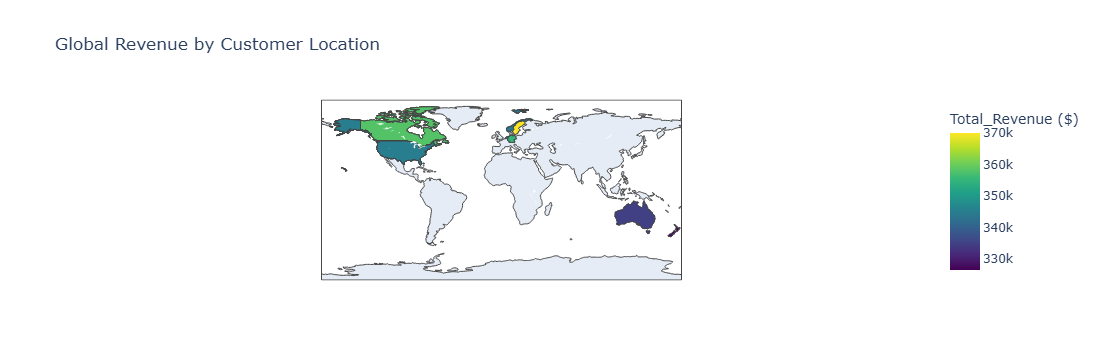

In [27]:
# World Map: Customer Revenue by Location 
# Ensure the Customer_Location column exists
if 'Customer_Location' in df.columns:
    location_revenue = df.groupby('Customer_Location')['Total_Revenue ($)'].sum().reset_index()
    fig = px.choropleth(
        location_revenue,
        locations='Customer_Location',
        locationmode='country names',
        color='Total_Revenue ($)',
        hover_name='Customer_Location',
        color_continuous_scale='Viridis',
        title='Global Revenue by Customer Location'
    )
    fig.show()
else:
    print(" 'Customer_Location' column not found. Skipping map visualization.")

High revenue concentration in North America, Europe, and Australia reflects Patagonia's brand presence in developed, eco-conscious regions. The low sales figures in these regions indicate that even marketing green, the awareness around eco-fashion is still growing in these regions. Asia and Africa may adopt green marketing practices, surrounding the sale of sustainable fashion.

## Statistical Test: One-Way ANOVA (Analysis of Variance)

In [28]:
from scipy import stats

# Group the data by gender
male_revenue = sustainable[sustainable['Gender'] == 'Male']['Total_Revenue ($)']
female_revenue = sustainable[sustainable['Gender'] == 'Female']['Total_Revenue ($)']
other_revenue = sustainable[sustainable['Gender'] == 'Other']['Total_Revenue ($)']

# Perform One-Way ANOVA test
f_stat, p_value = stats.f_oneway(male_revenue, female_revenue, other_revenue)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in average revenue between genders.")
else:
    print("There is no statistically significant difference in average revenue between genders.")

ANOVA F-statistic: 0.2215926953209777
p-value: 0.801244018125272
There is no statistically significant difference in average revenue between genders.


## References  

Le, T. M. (2025). *Sustainable Fashion Orders* [Online].  
Available at: [https://www.kaggle.com/datasets/thanhmaile/sustainable-fashion-orders?resource=download](https://www.kaggle.com/datasets/thanhmaile/sustainable-fashion-orders?resource=download)
